In [1]:
import matplotlib.pyplot as plt
from os.path import isfile, join, abspath, dirname
from os import listdir
import sys

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.insert(0, '../src/')

In [4]:
from logger import LogData, TemporalLogger, EnvLogger

In [5]:
__file__ = "analysis.ipynb"
log_dir = join(dirname(dirname(abspath(__file__))), "log")
log_att_dir = join(dirname(dirname(abspath(__file__))), "log_feat_test")

In [6]:
el = EnvLogger("PongNoFrameskip-v0", log_dir, 250)

In [7]:
el.params_df.columns

Index(['attention_target', 'attention_type', 'cntr', 'end_val',
       'entropy_coeff', 'env_name', 'icm_beta', 'init_val', 'max_grad_norm',
       'n_stack', 'num_envs', 'num_updates', 'reward_type', 'rollout_size',
       'tau', 'threshold', 'timestamp', 'value', 'value_coeff', 'mean_reward',
       'mean_feat_std', 'mean_proxy'],
      dtype='object')

In [8]:
cols = ['attention_target', 'attention_type', 'env_name', 
       'tau', 'timestamp', 'mean_reward',
       'mean_feat_std', 'mean_proxy']

In [9]:
el.params_df[cols].sort_values(by=["mean_reward", "mean_proxy"], ascending=False)#.loc[el.params_df.timestamp == '2019-07-20 10_21_45']

,attention_target,attention_type,env_name,tau,timestamp,mean_reward,mean_feat_std,mean_proxy
3,AttentionTarget.A2C,AttentionType.DOUBLE_ATTENTION,PongNoFrameskip-v0,50000.0,2019-08-31 12_20_51,-1.110693,0.512062,-0.568743
24,AttentionTarget.A2C,AttentionType.DOUBLE_ATTENTION,PongNoFrameskip-v0,50000,2019-08-31 12_20_51,-1.110693,0.512062,-0.568743
1,AttentionTarget.A2C,AttentionType.DOUBLE_ATTENTION,PongNoFrameskip-v0,1e-06,2019-08-28 23_21_51,-1.478305,0.449460,-0.664439
22,AttentionTarget.A2C,AttentionType.DOUBLE_ATTENTION,PongNoFrameskip-v0,"1,00E-06",2019-08-28 23_21_51,-1.478305,0.449460,-0.664439
11,AttentionTarget.ICM,AttentionType.SINGLE_ATTENTION,PongNoFrameskip-v0,1e-06,2019-09-04 14_15_10,-1.747017,0.449267,-0.784877
10,AttentionTarget.NONE,AttentionType.SINGLE_ATTENTION,PongNoFrameskip-v0,1e-06,2019-09-02 19_17_41,-2.077662,0.448821,-0.932498
12,AttentionTarget.ICM,AttentionType.DOUBLE_ATTENTION,PongNoFrameskip-v0,1e-06,2019-09-06 10_43_21,-2.419606,0.443910,-1.074087
0,AttentionTarget.A2C,AttentionType.SINGLE_ATTENTION,PongNoFrameskip-v0,1e-06,2019-08-27 18_59_23,-3.758885,0.462380,-1.738033
21,AttentionTarget.A2C,AttentionType.SINGLE_ATTENTION,PongNoFrameskip-v0,"1,00E-06",2019-08-27 18_59_23,-3.758885,0.462380,-1.738033
2,AttentionTarget.A2C,AttentionType.SINGLE_ATTENTION,PongNoFrameskip-v0,50000.0,2019-08-30 07_09_07,-4.400490,0.492712,-2.168175


2019-08-27 18_59_23


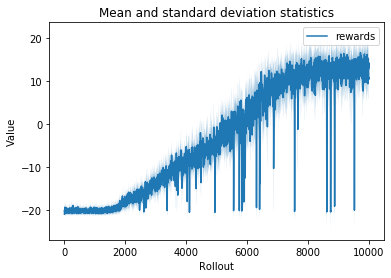

2019-08-28 23_21_51


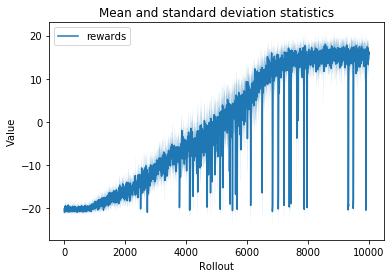

2019-08-30 07_09_07


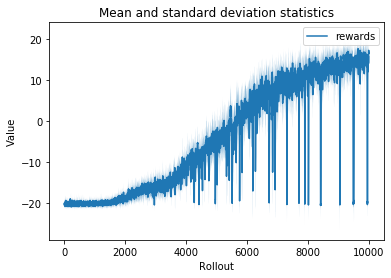

2019-08-31 12_20_51


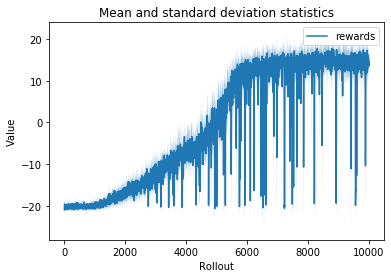

2019-09-01 18_27_46


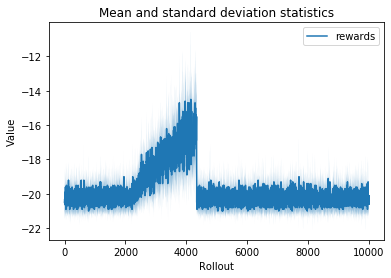

2019-09-03 00_17_39


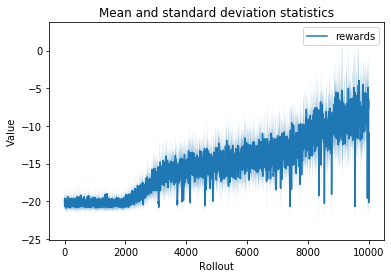

2019-09-04 05_42_56


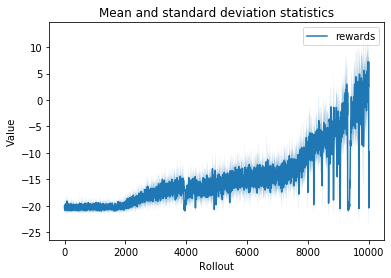

2019-09-05 11_40_00


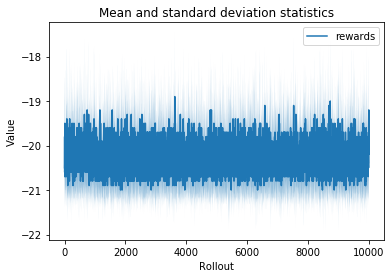

2019-09-06 16_44_01


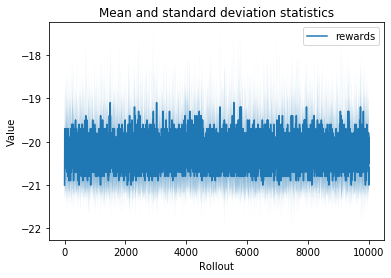

2019-09-09 22_16_30


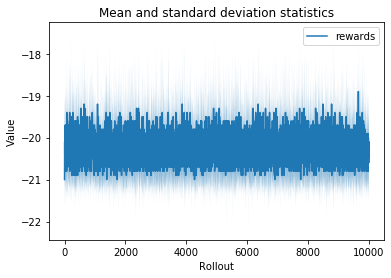

2019-09-02 19_17_41


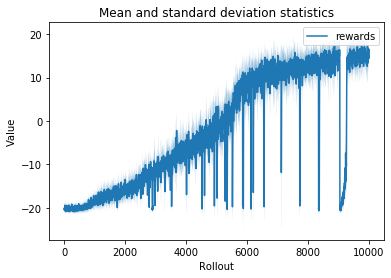

2019-09-04 14_15_10


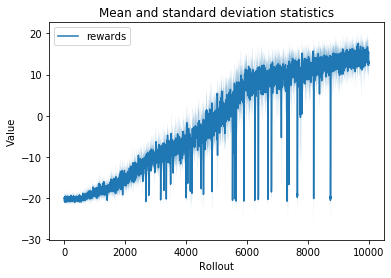

2019-09-06 10_43_21


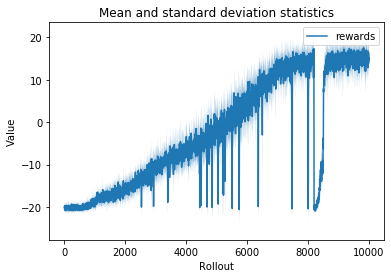

2019-07-20 10_21_45


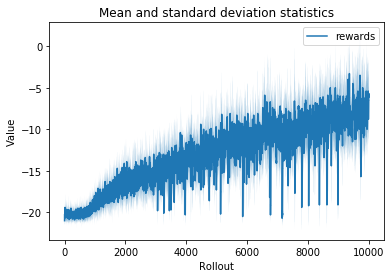

2019-07-22 15_01_57


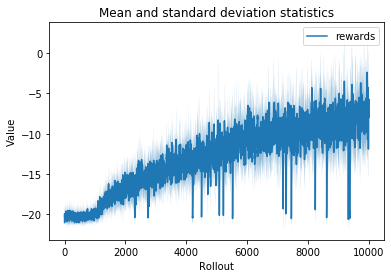

2019-07-24 20_34_46


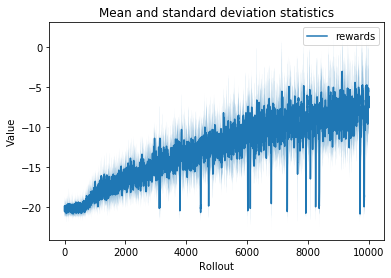

2019-08-03 19_55_20


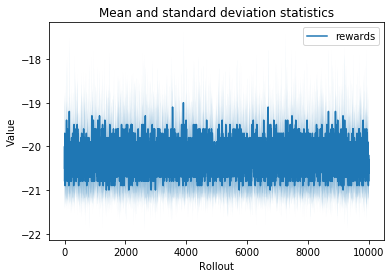

2019-08-06 10_26_43


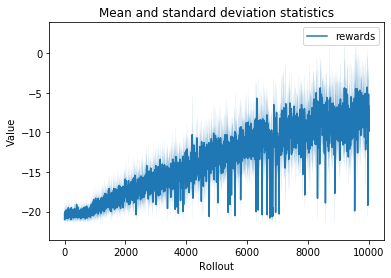

2019-08-09 01_39_43


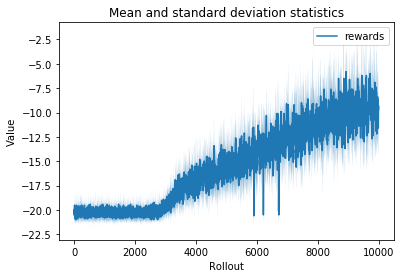

2019-08-11 18_59_01


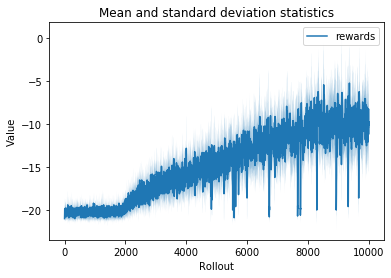

2019-08-15 21_46_35


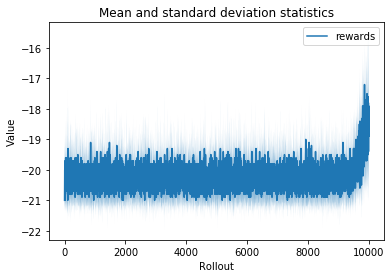

In [10]:
el.plot_mean_std(*["rewards"])

2019-08-27 18_59_23


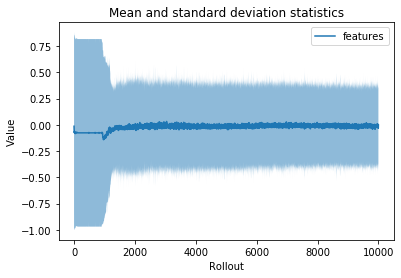

2019-08-28 23_21_51


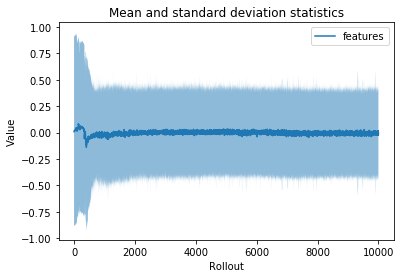

2019-08-30 07_09_07


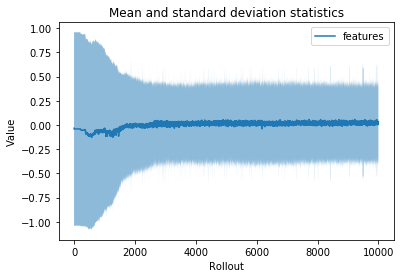

2019-08-31 12_20_51


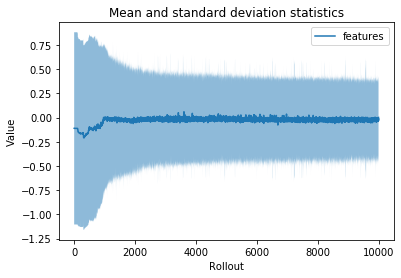

2019-09-01 18_27_46


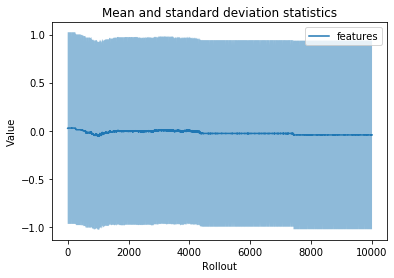

2019-09-03 00_17_39


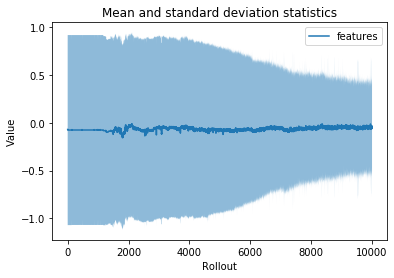

2019-09-04 05_42_56


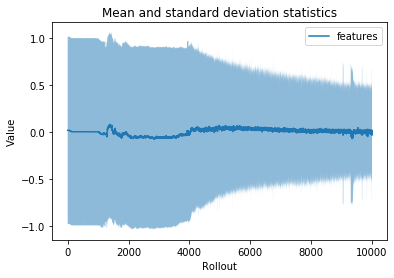

2019-09-05 11_40_00


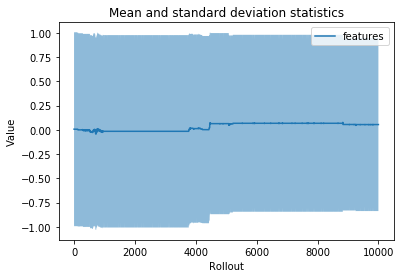

2019-09-06 16_44_01


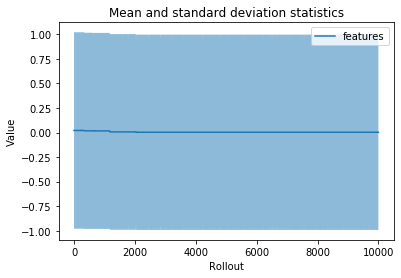

2019-09-09 22_16_30


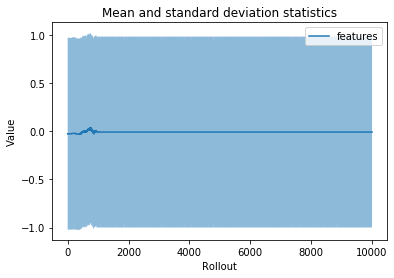

2019-09-02 19_17_41


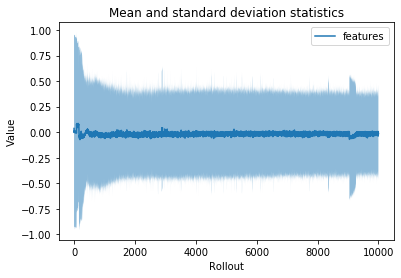

2019-09-04 14_15_10


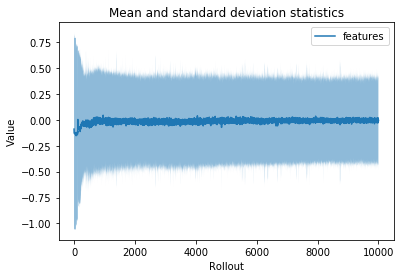

2019-09-06 10_43_21


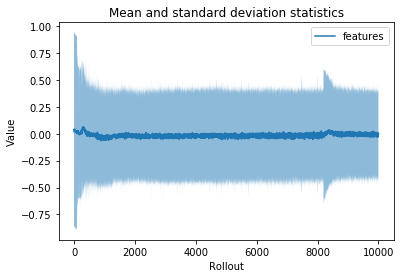

2019-07-20 10_21_45


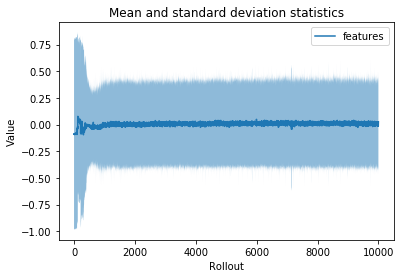

2019-07-22 15_01_57


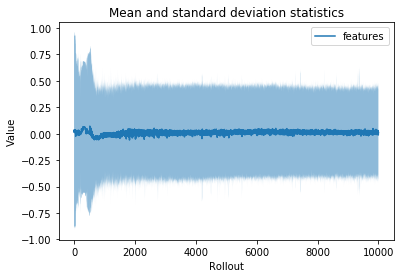

2019-07-24 20_34_46


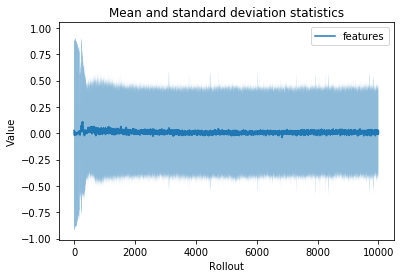

2019-08-03 19_55_20


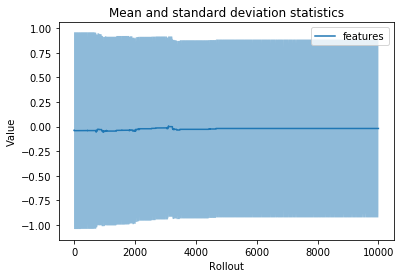

2019-08-06 10_26_43


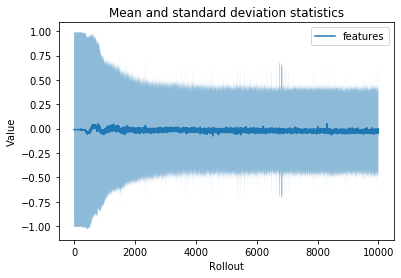

2019-08-09 01_39_43


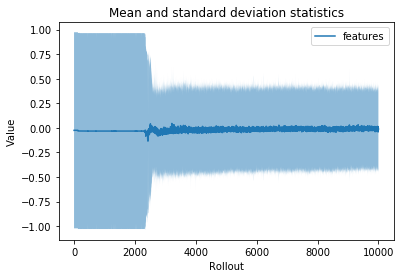

2019-08-11 18_59_01


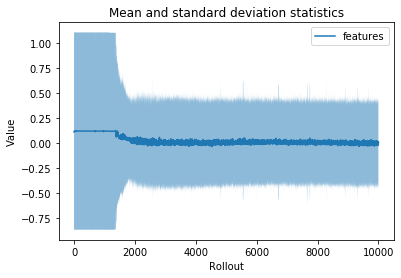

2019-08-15 21_46_35


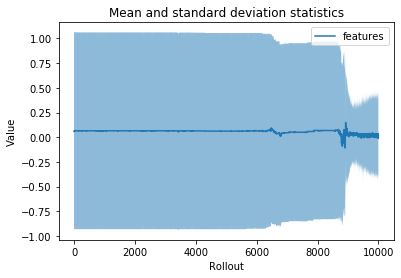

In [11]:
el.plot_mean_std(*["features"])

key=2019-08-27 18_59_23, proxy_val=-1.738032768165767
key=2019-08-28 23_21_51, proxy_val=-0.6644393615162373
key=2019-08-30 07_09_07, proxy_val=-2.168174976460039
key=2019-08-31 12_20_51, proxy_val=-0.5687429741227629
key=2019-09-01 18_27_46, proxy_val=-19.296348755251767
key=2019-09-03 00_17_39, proxy_val=-12.054868712120056
key=2019-09-04 05_42_56, proxy_val=-11.176668975758128
key=2019-09-05 11_40_00, proxy_val=-19.15660648873031
key=2019-09-06 16_44_01, proxy_val=-20.15912202098861
key=2019-09-09 22_16_30, proxy_val=-20.118954762182828
key=2019-09-02 19_17_41, proxy_val=-0.9324983302839095
key=2019-09-04 14_15_10, proxy_val=-0.784876894581094
key=2019-09-06 10_43_21, proxy_val=-1.0740868186325687
key=2019-07-20 10_21_45, proxy_val=-5.607737294964492
key=2019-07-22 15_01_57, proxy_val=-5.965944813304096
key=2019-07-24 20_34_46, proxy_val=-5.715806135144904
key=2019-08-03 19_55_20, proxy_val=-18.682765628781315
key=2019-08-06 10_26_43, proxy_val=-7.053573440307378
key=2019-08-09 01_3

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


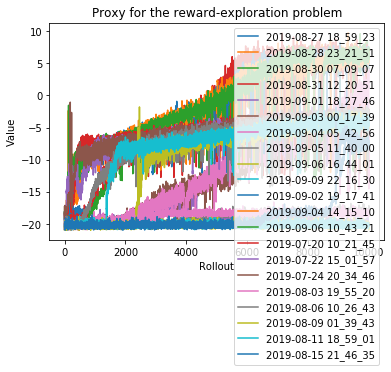

In [12]:
el.plot_proxy()